In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# load red wine data
data = np.loadtxt('winequality-red.csv', delimiter=';', skiprows=1)
X = data[:, :-1]
y = data[:, -1]


# split data into training and testing sets
from sklearn.model_selection import train_test_split
tr_X, te_X, tr_Y, te_Y = train_test_split(X, y, test_size=0.2, random_state=5)


In [50]:
#ANN model 20 hidden layers and 11 neurons in each layer   
# calssify wine quality with activation function relu
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(20,20,20,20,20,20,20,20,20,20,20), activation='relu', solver='adam', max_iter=1000, random_state=5)
#add weight to the neurons

clf.fit(tr_X, tr_Y)
pred_Y = clf.predict(te_X)
print('Accuracy of ANN classifier on training set: {:.5f}'
        .format(clf.score(tr_X, tr_Y)))
print('Accuracy of ANN classifier on test set: {:.5f}'
        .format(clf.score(te_X, te_Y)))


#inprove accuracy change hidden layers to 15
#add weight to the features




#clf = MLPClassifier(hidden_layer_sizes=(15,15,15,15,15,15,15,15,15,15,15), activation='relu', solver='adam', max_iter=1000, random_state=5)






Accuracy of ANN classifier on training set: 0.62080
Accuracy of ANN classifier on test set: 0.62187
Accuracy of ANN classifier on training set: 0.60985
Accuracy of ANN classifier on test set: 0.58437


[0.5125     0.6125     0.5625     0.54375    0.51875    0.675
 0.60625    0.58125    0.59375    0.62264151]
Accuracy: 0.58289 (+/- 0.09513)
Accuracy of random forest classifier on training set: 0.95856
Accuracy of random forest classifier on test set: 0.74062


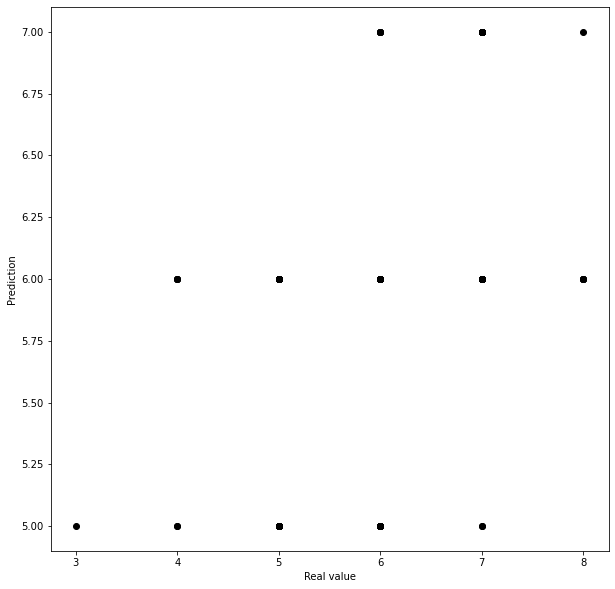

In [67]:
#random forest method classify wine quality
import tqdm
from sklearn.ensemble import RandomForestClassifier
#use tqdm to show the progress of the training
clf = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0)
clf.fit(tr_X, tr_Y)
pred_Y = clf.predict(te_X)

#k fold cross validation

from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X, y, cv=10)
print(scores)
print("Accuracy: %0.5f (+/- %0.5f)" % (scores.mean(), scores.std() * 2))

#print the accuracy of the random forest method
print('Accuracy of random forest classifier on training set: {:.5f}'
        .format(clf.score(tr_X, tr_Y)))
print('Accuracy of random forest classifier on test set: {:.5f}'
        .format(clf.score(te_X, te_Y)))



#plot the prediction of random forest method and the real value
plt.figure(figsize=(10, 10))
plt.plot(te_Y, pred_Y, 'o', color='black')
plt.xlabel('Real value')
plt.ylabel('Prediction')
plt.show()



Text(33.0, 0.5, 'True')

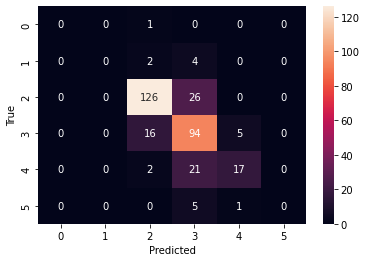

In [56]:
#bar plot for wine quality classification for random forest method for the training set and test set above      
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(te_Y, pred_Y)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')